### Objective
Create a learning curve for a binary classifier, plotting number of data input points verses a selected scoring metric.

### Method
* Step 1 -  [Import the required python modules.](#section_id_import_modules). Import of pandas dataframe, numpy, matplotlib and sklearn modules


* Step 2 -  [User selected parameters.](#section_id_parameters). Options for user to select scoring criteria, cross validation number etc.


* Step 3 -  [Import Database_csv_to_pandas](#section_id_import_database). Import of database csv file to pandas dataframe. Note: the csv file is an independently formatted file, composed of random scoring criteria and the output column in last position [-1].


* Step 4 -  [Select classifier model.](#section_id_classifier). Select the classifier algorithm to create the learning curve. It is assumed that hyperparameters have been tuned prior to this workflow but it can also be run with default parameters.


* Step 5 -  [Select cross validation parameter.](#section_id_cross_validation). Select a cross validation size. The test data size will limit the maximum number of number of training examples that can be achieved. This number is limited -> Max No. training samples = int(test_size * number of data points) 


* Step 6 -  [Feature scale input data](#section_id_feature_scale). Rescale the features/input columns such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.


* Step 6 -  [Plot learning curve](#section_id_plot).
Plot the number of training samples vs scoring metric. Also adds


### Dataset
A synthetic dataset with a binary outcome [0,1] in the last position. Most columns are discrete values [0,1,2,3,4,5] but some are continuous floats.
Note: the supplied input file is a conditioned, synthetic binary classification dataset i.e binary outcome of 0 or 1. You can simply add in a user selected database with the following preconditions: 1) Nan or empty cell values will be replaced with zero, 2) binary outcome only, 3) the results column is the last one [-1]. 

### Programming
This evaluation is performed using Python code and SKlearn provides all the classifier modules. 

At the time of script creation the following verions were used.
Python: 3.7.6
Numpy: 1.18.1
Pandas: 1.0.1
SKlearn: 0.22.1

### Outputs
for selected classifier:
Plot 1: No training examples v Scoring metric.
Plot 2: No training examples v Fit times.
Plot 3: Fit times v Scoring metric.

<a id='section_id_import_modules'></a>

### 1. Import required Python Modules

In [1]:
#pandas dataframe - similar to a python version of excel. Most efficient way to perform data operations
import pandas as pd

#numpy for most mathematical operations
import numpy as np

#sklearn for machine learning modules and scoring algorithms
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

#SKlearn classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

#plotting
import matplotlib.pyplot as plt

<a id='section_id_parameter'></a>

### 2. User selected parameters
Select scoring method, options of 'accuracy', 'precision', 'f1', 'roc_auc'
Crossvalidation fold i.e how many subsets the training data is split into for cross validation purposes, recommend value above 3 as this below this point overfits the data and will create a prediction error in the final assessment.

In [2]:
#Accuracy - ratio of correctly predicted observation to the total observations. 
#Accuracy works best if false positives and false negatives have similar cost. 
#Accuracy = TP+TN/TP+FP+FN+TN

#Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
#High precision relates to the low false positive rate.
#Precision = TP/TP+FP

#Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class
#Recall = TP/TP+FN

#F1 score - F1 Score is the weighted average of Precision and Recall. Takes both false pos and false neg into account. 
#Use F1 if you have an uneven class distribution. 
#If the cost of false positives and false negatives are very different - look at both Precision and Recall.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#roc_auc - the area under the receiver operating characteristic, plots the False Positive rate vs True Positive Rate for different thrshold cut offs.
#The best models should plot towards the upper left quadrant of the plot, therefore calculating the area under the curve is a good measure of model performance.


#score_cat = 'roc_auc'
score_cat = 'accuracy'
#score_cat = 'precision'
#score_cat = 'f1_score'

#plot labels are updated based upon 
if score_cat == 'roc_auc':
    plot_label = 'AUC'
if score_cat == 'accuracy':
    plot_label = 'Accuracy'
if score_cat == 'precision':
    plot_label = 'Precision' 
if score_cat == 'recall':
    plot_label = 'Recall'    
if score_cat == 'f1_score':
    plot_label = 'f1 score'  
    
#number of folds (equal data subsets) employed in cross validation - recommended to use above 4 for this dataset    
cross_validation_fold = 3    

#see random number generators - for repeatability
random_seed = 57

#proportion size of test data for scoring purposes. 
#i.e test_size = 0.2 = training size = 0.8 * number of samples, test size = 0.2 * training samples.
#must be a number 
test_size = 0.2


<a id='section_id_import_database'></a>

### 3. Import database csv file to pandas
The csv file is imported into a pandas dataframe, allowing ease of computation in later modules. All columns are considered numeric. The column header is the data category and the index is the row ID. There should be no Nan or empty cell values amd the output column is assumed to be in last column position.

In [3]:
def readcsvfile():
    '''
    (csv)->(pandas dataframe)
    routine to read import csv file to pandas
    comma separation, column headers = first row of text
    All column data is considered numeric
    Index = row 
    -999.25 values are converted to numpy NaN
    PRECONDITION: Import csv file is the correct format. All lines without a 1/0 output removed.
    KJAGGS June 2020
    '''
    
    #read csv file to pandas dataframe
    df = pd.read_csv('classification_dataset.csv', encoding = 'utf-8',header=0,sep=',', index_col=0)
    #df = df.set_index('Row ID')
    df = df.apply(pd.to_numeric, errors='ignore')
    df = df.replace(-999.25,np.NaN)
    df = df.replace(np.NaN,0)
    #print(df.isnull().any())
    return df

df = readcsvfile()

###optional qc features - remove hash/# to view 
#print(df.head)
#print(df.columns.tolist)

#number of data inputs - used for cross validation split max training size
data_samples = df.shape[0]



print("Dataframe size on import")
print("Number of prospects :", df.shape[0])
print("Number of data categories :", df.shape[1])


#remove result column from input dataset
y = df[df.columns[-1]]

#X = df.drop(df.columns[[-1]], axis=1)
#X = df.drop(df.columns[[1,-1]], axis=1)
X = df.drop(df.columns[[0,1,-1]], axis=1)

Dataframe size on import
Number of prospects : 352
Number of data categories : 43


<a id='section_id_classifier'></a>

### 4. Select classifier model.
Select the classifier algorithm to create the learning curve. It is assumed that hyperparameters have been tuned prior to this workflow but it can also be run with default parameters.

In [4]:
#select classifier algorithm and tuned parameters
#uncheck the required module as required

#classifier_type = 'Support Vector'
#classifier_type = 'Logistic Regression'
classifier_type = 'Random Forest'


if classifier_type == 'Support Vector':
    evaluation_model =  SVC(C = 2, gamma = 0.01,  kernel = 'rbf')
if classifier_type == 'Logistic Regression':
    evaluation_model = linear_model.LogisticRegression(C=0.1, penalty= 'l2',random_state=random_seed)
if classifier_type == 'Random Forest':
    evaluation_model = RandomForestClassifier(bootstrap=True,max_depth = None, max_features= 'sqrt', 
    min_samples_leaf = 9, min_samples_split= 5, n_estimators = 1650)
    

<a id='section_id_cross_validation'></a>

### 5. Select cross validation parameter.
Select a cross validation size. The test data size will limit the maximum number of number of training examples that can be achieved. This number is limited -> Max No. training samples = int(test_size * number of data points) 

In [5]:
#cross validation parameters, test size specified earlier
cv = ShuffleSplit(n_splits=cross_validation_fold, test_size=test_size, random_state=random_seed)

#array for number of training samples to calculate
train_plot_points = []

#determine the maximum possible training set size from the specified split.
#1-training split * number if input samples
max_training_cv = int((1-test_size)*data_samples)
#determine the points (in muber of samples) to calculate cv/train scores 
training_point_interval = int((max_training_cv-10)/6) 
for i in range(10,int((1-test_size)*data_samples),training_point_interval):
    train_plot_points.append(i)
    #print(i)

#print(train_plot_points)  
    


<a id='section_id_feature_scale'></a>

### 6. Feature scale the input data
Input independent variables are scaled so that the the attribute mean is zero with a unit standard deviation. Gradient descent algorithms (neural networks, for example) run more efficiently if input features are scaled accordingly.

In [6]:
#set up scaler - StandardScaler from SciKit learn
#Standardize features by removing the mean and scaling to unit variance
#z = (x - u) / s
scaler = StandardScaler()

#scaler is calculated on the train data ONLY. Would be considered data leakage - test data must not influence the model output.
scaler.fit(X)

#apply the scaler to the train and test datasets
X_scaled = scaler.transform(X)


<a id='section_id_plot'></a>

### 7. Plot learning curve
Plot the number of training samples vs scoring metric. Also adds

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

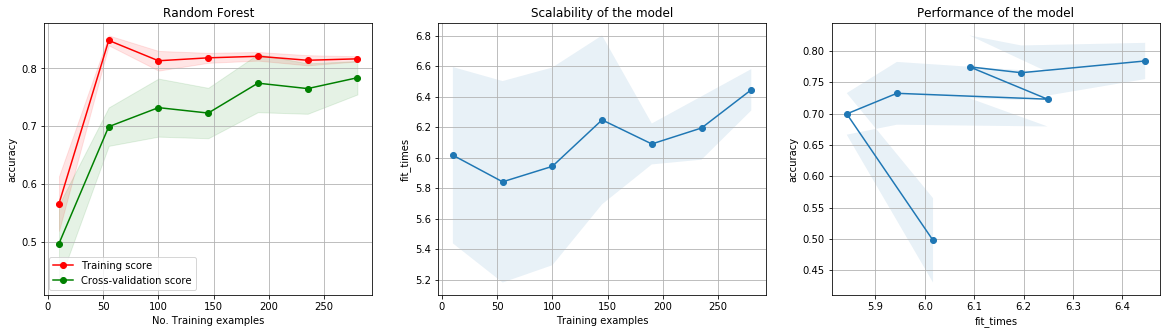

In [7]:
def model_validation_panel(model, X_val, y_val, cv, train_plot= [4,8,12,16,20], score_metric = 'accuracy', title = 'SciKitLearn Classifier'):
    '''
    (scikitlearn classifier)(pandas/numpy array)(pandas/numpy array)(int)(list of int)(string)(string)->(Matplotlib plot)
    Function to plot 3 panels.
    Panel 1 - No training samples vs scoring metric
    Panel 2 - No training samples vs fit time
    Panel 3 - Fit time vs scoring metric
    Based upon the example from scikit learn
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
    PRECONDITION: supplied models and input datasets are correct. Max number of features > highest value in train_plot list.
    K JAGGS JAN 2020
    '''
    train_sizes, train_scores, valid_scores, fit_times, _  = learning_curve(
        model, X_val, y_val, train_sizes=train_plot, 
        scoring=score_metric, n_jobs=-1, cv=cv,return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    
    
    # Plot n_samples vs score
    axes[0].grid()
    axes[0].set_title(title)
    #if ylim is not None:
    #    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("No. Training examples")
    axes[0].set_ylabel(score_metric)

    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                         valid_scores_mean + valid_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    axes[0].plot(train_sizes, valid_scores_mean, 'o-', color="g",label="Cross-validation score")
    axes[0].legend(loc="best")
    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, valid_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, valid_scores_mean - valid_scores_std,
                         valid_scores_mean + valid_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel(score_metric)
    axes[2].set_title("Performance of the model")
    
model_validation_panel(evaluation_model, X_scaled, y, cv,train_plot = train_plot_points, score_metric = score_cat,title = classifier_type)